In [501]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [502]:
#!pip install xlrd

In [503]:
import os


file_path = r'C:\Users\SANIKA\Documents\train_agriculture.xlsx'
print( os.path.isfile(file_path))

True


In [504]:
train=pd.read_excel(r'C:\Users\SANIKA\Documents\train_agriculture.xlsx')

In [505]:
test=pd.read_excel(r'C:\Users\SANIKA\Documents\test_agriculture.xlsx')

In [506]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [507]:
train.shape

(4599, 10)

In [508]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [509]:
test.shape

(1199, 9)

In [510]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [511]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [512]:
test.nunique()

ID                         1199
Estimated_Insects_Count      70
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            18
Number_Weeks_Used            58
Number_Weeks_Quit            42
Season                        3
dtype: int64

In [513]:
train.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [514]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [515]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [516]:
train[train['Number_Weeks_Used'].isna()]

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
10,F00000021,1212,1,0,1,0,NaN,0,3,0
17,F00000037,2401,0,1,1,0,NaN,0,1,1
35,F00000076,257,0,0,3,30,NaN,0,2,0
...,...,...,...,...,...,...,...,...,...,...
4538,F00007983,1898,0,1,2,35,NaN,13,2,0
4548,F00008002,2015,0,1,2,10,NaN,18,1,0
4558,F00008013,2015,0,1,2,20,NaN,12,2,0
4578,F00008055,2139,0,1,2,20,NaN,22,2,0


In [517]:
data = pd.concat([train, test])
data.sample(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4438,F00007807,1478,0,1,2,10,30.0,2,2,1.0
4207,F00007412,915,0,1,2,40,23.0,13,2,0.0
1185,F00002093,2138,0,0,2,10,40.0,8,3,0.0
1827,F00003176,1212,0,1,2,30,40.0,3,2,0.0
1639,F00002859,851,0,1,2,30,27.0,7,3,0.0
3083,F00005448,916,1,1,3,20,30.0,0,1,1.0
4564,F00008025,2016,0,1,2,50,23.0,27,2,0.0
4080,F00007178,625,0,1,2,30,15.0,13,2,0.0
1558,F00002730,732,0,1,2,10,5.0,22,2,0.0
2019,F00003494,1785,0,1,2,80,22.0,19,2,0.0


In [518]:
data.shape

(5798, 10)

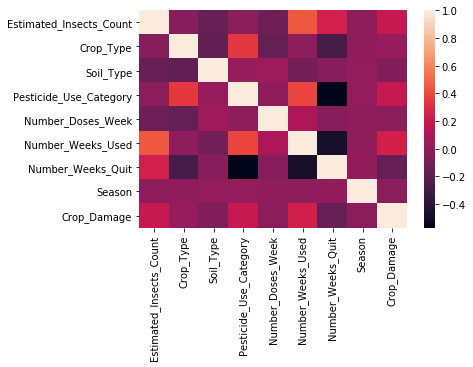

In [519]:
data_cor=train.corr()
sns.heatmap(data_cor)

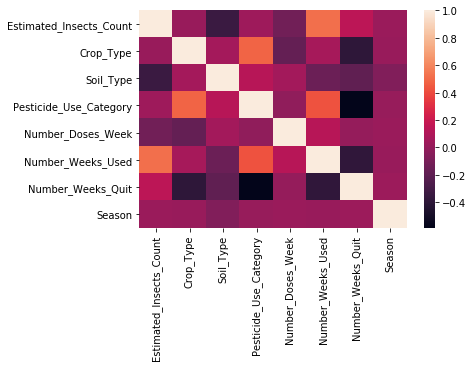

In [520]:
data_cor=test.corr()
sns.heatmap(data_cor)

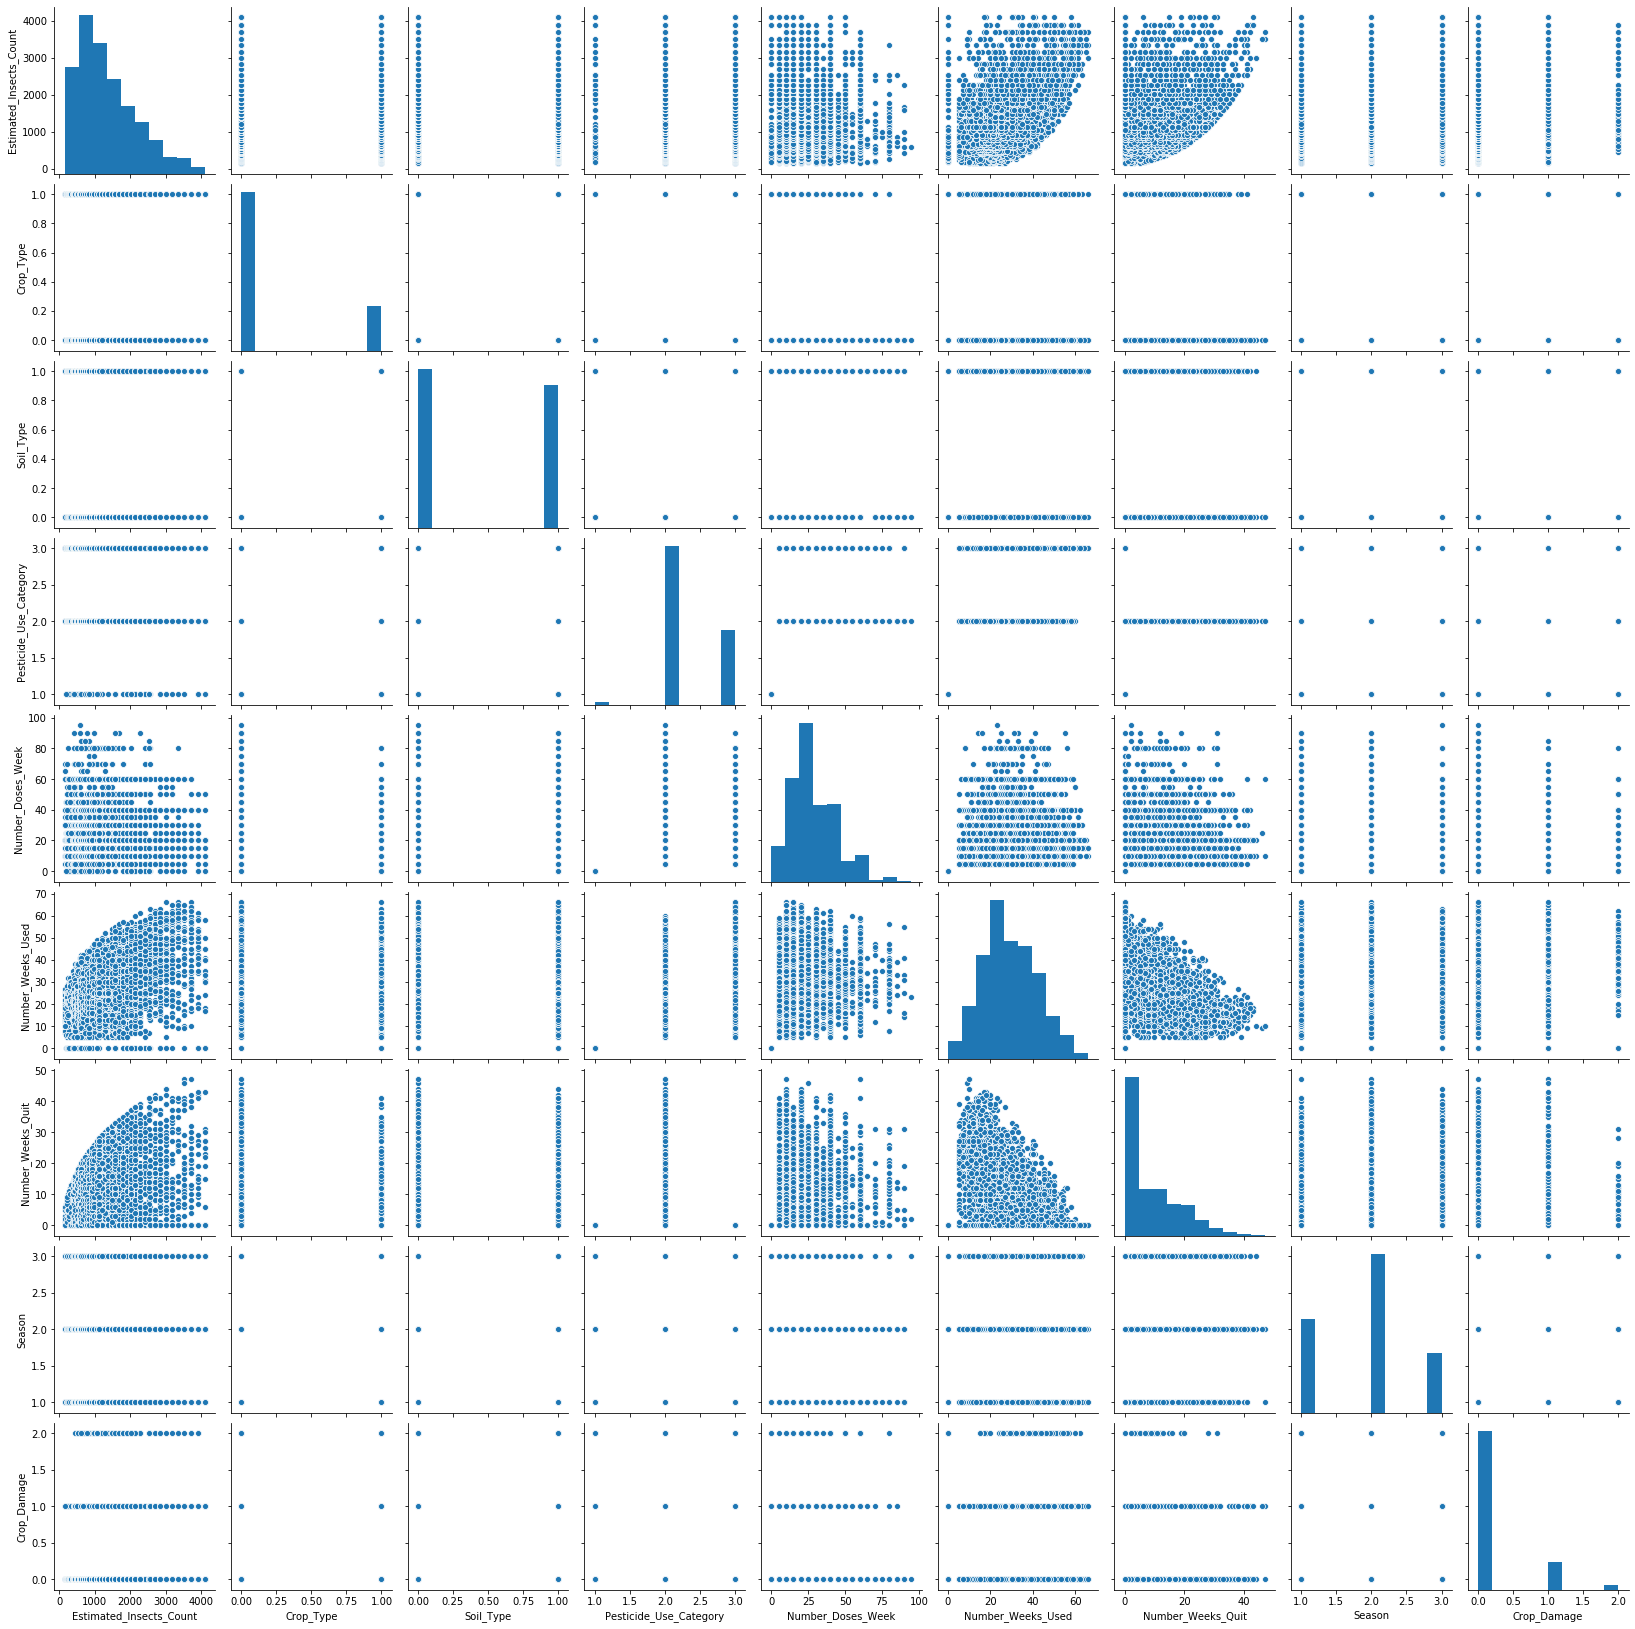

In [521]:
sns.pairplot(data)

In [522]:
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [523]:
data['Number_Weeks_Used'].fillna(data['Number_Weeks_Used'].mode()[0], inplace=True)
data['Crop_Damage'].fillna(train['Crop_Damage'].mode()[0], inplace=True)

In [524]:
data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [525]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [526]:
data.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.422264
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.721552
dtype: float64

In [527]:
skew=( 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season','Crop_Damage')
for col in skew :
    if train.skew().loc[col]>0.55:
        train[col] = np.log1p(train[col])

In [528]:
data.skew()

Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.422264
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.721552
dtype: float64

In [534]:
x=data.iloc[:, :-1].values

In [535]:
y=data.iloc[:, 1].values

In [536]:
column = ['ID']
le = LabelEncoder()
for i in column:
    data[i] = le.fit_transform(data[i].astype(str))

print(data.dtypes)

ID                           int32
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object


In [537]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0.0,0,1
1,1112,209,1,0,1,0,0.0,0,2
2,2223,257,1,0,1,0,0.0,0,2
3,3334,257,1,1,1,0,0.0,0,2
4,4445,342,1,0,1,0,0.0,0,2


In [538]:
from sklearn.model_selection import train_test_split 
  
x_train, x_test, y_train, y_test = train_test_split( 
  
   x, y, test_size = 0.25, random_state = 40)

In [539]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.05172413793103448
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         150       0.00      0.00      0.00         4
         151       0.00      0.00      0.00         4
         168       0.00      0.00      0.00         5
         169       0.00      0.00      0.00         1
         188       0.25      0.43      0.32         7
         209       0.00      0.00      0.00         8
         231       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         256       0.00 

Accuracy score of  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.21310344827586206
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         150       0.00      0.00      0.00         4
         151       0.00      0.00      0.00         4
         168       0.00      0.00      0.00         5
         169       0.00      0.00      0.00         1
         188       0.00      0.00      0.00         7
         209       0.00      0.00      0.00         8
         231       0.00      0.00      0.00         1
         232       0.00      0.00      0.00         1
         256       0.00      0.00      0.00         7
         257       0.00      0.00      0.00   

In [541]:
from sklearn.externals import joblib
#save the model 
joblib.dump(m, 'Project10.obj')

['Project10.obj']